In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import zipfile
import gdown
import matplotlib.image as mpimg

2024-12-11 18:39:15.199763: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
image_extensions = {'.jpg', '.jpeg', '.png'}

In [3]:
working_dir = os.getcwd()
base_dir = os.path.join(working_dir, "All_Data_Fixed")
classes = os.listdir(base_dir)
classes

['Without_Peter_All_fixed', '.DS_Store', 'With_Peter_All_fixed']

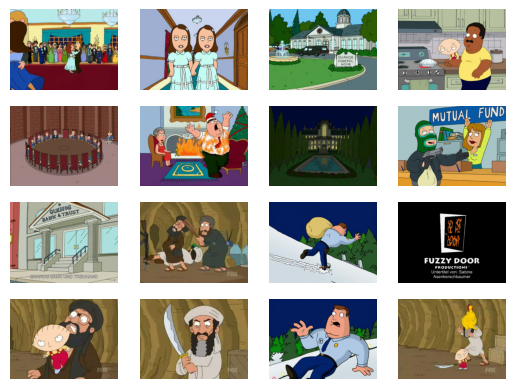

In [4]:
fig = plt.gcf()

with_dir = os.path.join('All_Data_Fixed/With_Peter_All_fixed')
without_dir = os.path.join('All_Data_Fixed/Without_Peter_All_fixed')
with_names = os.listdir(with_dir)
without_names = os.listdir(without_dir)

pic_index = 100

with_images = [os.path.join(with_dir, fname)
              for fname in with_dir[pic_index-16:pic_index]]
without_images = [os.path.join(without_dir, fname)
              for fname in without_names[pic_index-16:pic_index]]

for i, img_path in enumerate(with_images + without_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [5]:
# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(320,240),
                                                  subset='training',
                                                  seed = 1,
                                                  validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(320,240),
                                                  subset='validation',
                                                  seed = 1,
                                                  validation_split=0.1,
                                                  batch_size= 32)

Found 1804 files belonging to 2 classes.
Using 1624 files for training.
Found 1804 files belonging to 2 classes.
Using 180 files for validation.


2024-12-08 04:07:19.725618: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-08 04:07:19.725677: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

def preprocess_dataset(image, label):
    # Apply ResNet50 preprocessing
    image = preprocess_input(image)
    return image, label

# Preprocess datasets using the custom function
train_datagen = train_datagen.map(preprocess_dataset)
test_datagen = test_datagen.map(preprocess_dataset)

In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(320, 240, 3))
base_model.trainable = False

model = tf.keras.models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 7, 512)        14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               1

In [9]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10


2024-12-08 04:07:30.202942: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1624]
	 [[{{node Placeholder/_4}}]]
2024-12-08 04:07:30.203228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1624]
	 [[{{node Placeholder/_0}}]]
2024-12-08 04:07:30.737098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-08 04:07:30.823962: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain termina

51/51 [==============================] - ETA: 0s - loss: 0.6115 - accuracy: 0.7087

2024-12-08 04:07:44.594688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [180]
	 [[{{node Placeholder/_4}}]]
2024-12-08 04:07:44.594906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [180]
	 [[{{node Placeholder/_4}}]]
2024-12-08 04:07:44.695624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


51/51 [==============================] - 16s 290ms/step - loss: 0.6115 - accuracy: 0.7087 - val_loss: 1.4376 - val_accuracy: 0.6333
Epoch 2/10
51/51 [==============================] - 14s 272ms/step - loss: 0.4593 - accuracy: 0.8128 - val_loss: 0.9641 - val_accuracy: 0.6667
Epoch 3/10
51/51 [==============================] - 14s 277ms/step - loss: 0.3918 - accuracy: 0.8264 - val_loss: 0.5790 - val_accuracy: 0.7778
Epoch 4/10
51/51 [==============================] - 14s 276ms/step - loss: 0.3750 - accuracy: 0.8374 - val_loss: 0.6508 - val_accuracy: 0.7722
Epoch 5/10
51/51 [==============================] - 14s 277ms/step - loss: 0.3375 - accuracy: 0.8565 - val_loss: 0.4510 - val_accuracy: 0.8056
Epoch 6/10
51/51 [==============================] - 15s 281ms/step - loss: 0.3277 - accuracy: 0.8590 - val_loss: 0.4539 - val_accuracy: 0.8056
Epoch 7/10
51/51 [==============================] - 14s 276ms/step - loss: 0.2975 - accuracy: 0.8732 - val_loss: 0.5135 - val_accuracy: 0.8111
Epoch 8/10

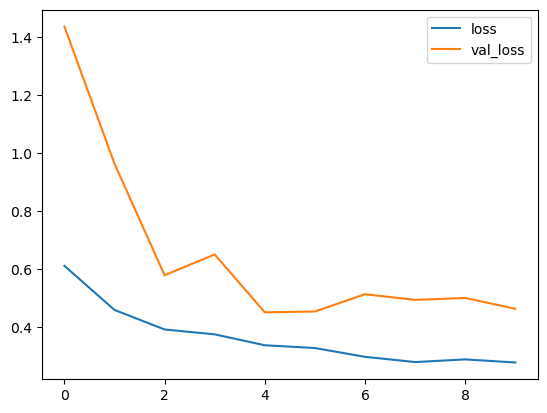

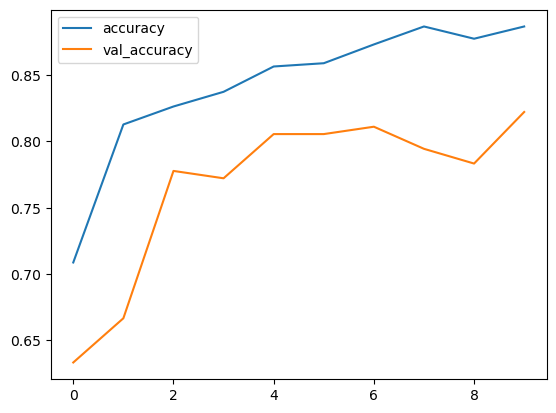

In [11]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 277ms/step


2024-12-08 04:10:05.969091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Without Peter
1/1 [==============================] - 0s 20ms/step
With Peter
1/1 [==============================] - 0s 18ms/step
Without Peter
1/1 [==============================] - 0s 18ms/step
Without Peter


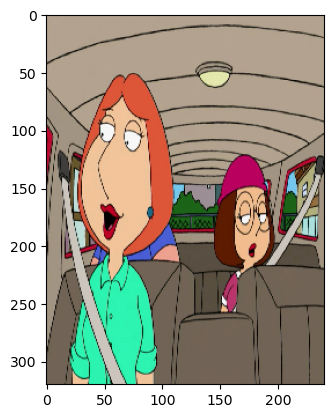

In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_image1_path = os.path.join(working_dir, "model_test/S1E05_500.jpg")
test_image2_path = os.path.join(working_dir, "model_test/S1E05_1000.jpg")
test_image3_path = os.path.join(working_dir, "model_test/S1E05_1500.jpg")
test_image4_path = os.path.join(working_dir, "model_test/S1E05_2000.jpg")


image_paths = [test_image1_path, 
               test_image2_path, 
               test_image3_path, 
               test_image4_path]
#Input image
for i in range(len(image_paths)):
    test_image = load_img(image_paths[i],target_size=(320,240))
    
    #For show image
    plt.imshow(test_image)
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis=0)
    
    # Result array
    result = model.predict(test_image)
    
    #Mapping result array with the main name list
    i=0
    if(result<=0.5):
      print("With Peter")
    else:
      print("Without Peter")

1/1 [==============================] - 0s 17ms/step
Without Peter


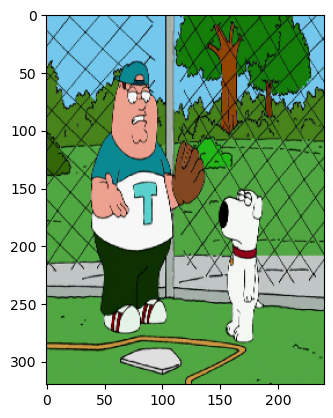

In [13]:
test_image = load_img(test_image1_path,target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
    print("With Peter")
else:
    print("Without Peter")

1/1 [==============================] - 0s 18ms/step
With Peter


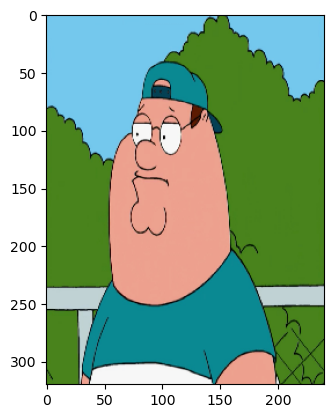

In [14]:
test_image = load_img(test_image2_path,target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
    print("With Peter")
else:
    print("Without Peter")

1/1 [==============================] - 0s 17ms/step
Without Peter


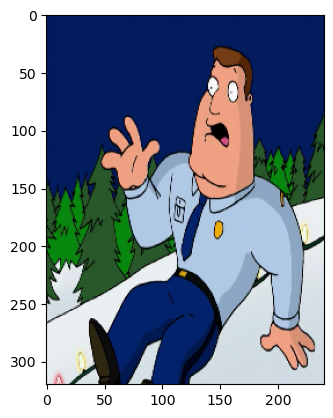

In [15]:
test_image = load_img(test_image3_path,target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
    print("With Peter")
else:
    print("Without Peter")

1/1 [==============================] - 0s 20ms/step
Without Peter


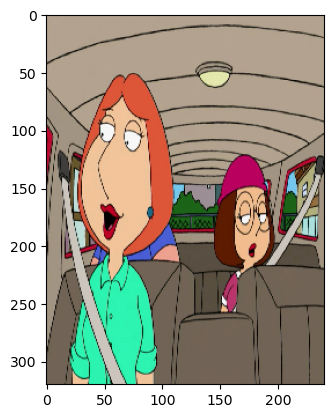

In [16]:
test_image = load_img(test_image4_path,target_size=(320,240))

#For show image
plt.imshow(test_image)
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result<=0.5):
    print("With Peter")
else:
    print("Without Peter")

In [17]:
tp = 0 
fp = 0 
tn = 0 
fn = 0  

for images, labels in test_datagen:
    preds = model.predict(images)
    # threshold=0.5
    binary_preds = (preds > 0.5).astype(int).flatten()
    labels = labels.numpy().flatten()
    
    for pred, true_label in zip(binary_preds, labels):
        if pred == 1 and true_label == 1:
            tp += 1  # Correctly predicted 'With Peter'
        elif pred == 1 and true_label == 0:
            fp += 1  # Incorrectly predicted 'With Peter'
        elif pred == 0 and true_label == 0:
            tn += 1  # Correctly predicted 'Without Peter'
        elif pred == 0 and true_label == 1:
            fn += 1  # Incorrectly predicted 'Without Peter'

# Print results
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


1/1 [==============================] - 0s 102ms/step
True Positives (TP): 94
False Positives (FP): 16
True Negatives (TN): 54
False Negatives (FN): 16


In [18]:
directory = "frames_resized"

files = [f for f in os.listdir(directory) if f.startswith("out-") and f.endswith(".jpg")]

sorted_files = sorted(files, key=lambda x: int(x.split('-')[1].split('.')[0]))

In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

classified = []

index = 0
for file in sorted_files:
    file_path = os.path.join(directory, file)
    test_image = load_img(file_path,target_size=(320,240))
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis=0)
    result = model.predict(test_image,verbose=0)
    if(result<0.5):
        peter = 1
    else:
        peter = 0
    classified.append(peter)
    #if(index<100):
        #print(file,peter)
    index += 1

In [20]:
print(classified)

[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [3]:
directory = "/Users/jaewon/Documents/CSE151A/Milestone5/frames_classified/With_Peter"

files = [f for f in os.listdir(directory) if f.startswith("out-") and f.endswith(".jpg")]

classified_actual = [0 for _ in range(len(classified))] 

for file in files:
    integer_part = int(file.split('-')[1].split('.')[0])
    integer_part = int(integer_part/10)
    classified_actual[integer_part] = 1

print(classified_actual)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [4]:
T = np.sum(np.array(classified) == np.array(classified_actual))
F = np.sum(np.array(classified) != np.array(classified_actual))
accuracy = T / (T+F)
print(T+F)
print(accuracy)

6540
0.782262996941896


In [23]:
print(np.sum(np.array(classified_actual) == 1))
print(np.sum(np.array(classified_actual) == 0))

3140
3400
